## Import Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

## PART I: Initial Data Analysis And Preprocessing

### Overview

This is the IDA and Preprocessing component of this solution. The workflow for this notebook is outlined as follows:
- Getting the data
- First insights: Making sense of the data

## 1. Import the data

In [2]:
data = pd.read_csv("data_file.csv")
data.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


## 2. Data Inspection

In [3]:
data_dim = data.shape

print(f"This data has {data_dim[0]} Rows and {data_dim[1]} Columns")

This data has 62485 Rows and 18 Columns


## Part II: Exploratory Data Analysis and Feature Engineering
<h4><b>Overview</b></h4>

This is the EDA component of this solution. The workflow for this notebook is outlined as follows:
- Data cleaning/manipulation
- Multivariate Exploratory Analysis
- Splitting the data (Using K-fold and single split)

## 1. Checking for null or unwanted values

In [4]:
data.isnull().sum()

FileName              0
md5Hash               0
Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64

## 2. Exploration

In [5]:
data.describe()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,62485.000000,6.248500e+04,6.248500e+04,62485.000000,62485.000000,6.248500e+04,6.248500e+04,6.248500e+04,62485.000000,62485.000000,62485.000000,6.248500e+04,62485.000000,6.248500e+04,62485.000000,62485.000000
mean,6756.472657,2.587048e+04,1.541611e+05,58.785997,5.417524,8.953186e+05,4.094623e+05,1.466311e+05,9.782604,6.613171,4.751172,8.759830e+05,12966.031400,1.844664e+05,0.018004,0.433992
std,13345.499919,6.461396e+06,1.903142e+06,1114.068244,2.543697,3.779527e+07,2.851820e+07,1.124630e+06,9.047157,16.976465,2.138584,6.288189e+05,15762.725511,1.732625e+07,0.132968,0.495628
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,332.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000e+00,0.000000e+00,4.096000e+03,6.000000,0.000000,3.000000,2.621440e+05,0.000000,1.080000e+03,0.000000,0.000000
50%,332.000000,0.000000e+00,0.000000e+00,0.000000,5.000000,0.000000e+00,0.000000e+00,8.520000e+03,9.000000,0.000000,5.000000,1.048576e+06,320.000000,2.496000e+03,0.000000,0.000000
75%,332.000000,2.800000e+01,1.283200e+04,6.000000,6.000000,2.875200e+04,1.040000e+02,6.553600e+04,11.000000,10.000000,6.000000,1.048576e+06,32768.000000,2.350400e+04,0.000000,1.000000
max,43620.000000,1.615155e+09,2.852127e+08,63325.000000,260.000000,2.147484e+09,2.415919e+09,6.615450e+07,255.000000,255.000000,33.000000,1.677722e+07,58632.000000,4.294942e+09,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [7]:
data["DebugSize"].value_counts()

0             36521
28            12719
84             8974
56             4087
112              89
1                55
536               9
257               6
32                3
30                3
512               3
140               2
109               1
256               1
102               1
1236              1
49                1
16                1
17                1
1615155235        1
135               1
4                 1
10                1
1056              1
276               1
1072              1
Name: DebugSize, dtype: int64

In [8]:
data["NumberOfSections"].value_counts()[:20]

C:\Users\adero\AppData\Local\Temp/ipykernel_2648/724985837.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data["NumberOfSections"].value_counts()[:20]


5     15304
3     14124
4     10018
6      7803
2      5202
7      4219
8      1785
9      1250
10      855
1       628
11      500
13      275
12      273
14       97
17       39
19       33
15       22
16       21
18       16
20        7
Name: NumberOfSections, dtype: int64

In [9]:
# Correlation between features
data.corr()

C:\Users\adero\AppData\Local\Temp/ipykernel_2648/1053635222.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
Machine,1.000000,-0.001924,0.057530,0.044044,0.380672,-0.005199,-0.006838,0.077284,0.099463,-0.019648,0.220295,-0.232794,0.033809,-0.000603,0.070023,0.549434
DebugSize,-0.001924,1.000000,-0.000287,-0.000207,-0.002226,-0.000093,-0.000055,-0.000507,-0.001671,-0.001558,-0.003275,0.001208,-0.003290,-0.000042,-0.000541,-0.003500
DebugRVA,0.057530,-0.000287,1.000000,0.016538,0.022162,0.019699,-0.001079,0.457697,0.031796,-0.006481,0.049066,-0.009498,0.017233,0.000723,0.114187,0.072781
MajorImageVersion,0.044044,-0.000207,0.016538,1.000000,0.042068,-0.000102,-0.000756,0.012210,0.005562,-0.006564,0.026520,-0.027773,0.000987,-0.000445,-0.003054,0.049603
MajorOSVersion,0.380672,-0.002226,0.022162,0.042068,1.000000,-0.001781,-0.007947,0.054260,0.193996,0.012626,0.183420,-0.340831,0.071795,-0.001643,0.021022,0.398076
ExportRVA,-0.005199,-0.000093,0.019699,-0.000102,-0.001781,1.000000,0.183336,0.030379,0.002458,-0.004613,0.002855,0.004430,-0.017103,0.000624,0.004290,-0.012547
ExportSize,-0.006838,-0.000055,-0.001079,-0.000756,-0.007947,0.183336,1.000000,-0.001651,-0.012077,0.002214,0.025139,0.003927,-0.011794,-0.000084,-0.001738,-0.012457
IatVRA,0.077284,-0.000507,0.457697,0.012210,0.054260,0.030379,-0.001651,1.000000,0.029398,0.017115,0.120933,0.019149,-0.007297,0.001187,0.146013,0.084622
MajorLinkerVersion,0.099463,-0.001671,0.031796,0.005562,0.193996,0.002458,-0.012077,0.029398,1.000000,0.041021,0.017235,-0.028226,0.210027,-0.003666,0.015706,0.296925
MinorLinkerVersion,-0.019648,-0.001558,-0.006481,-0.006564,0.012626,-0.004613,0.002214,0.017115,0.041021,1.000000,0.178002,0.001123,-0.186791,0.004039,-0.024033,-0.111294


In [10]:
# Correlation with target variable
data.corr()["Benign"]

C:\Users\adero\AppData\Local\Temp/ipykernel_2648/3865861743.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Benign"]


Machine               0.549434
DebugSize            -0.003500
DebugRVA              0.072781
MajorImageVersion     0.049603
MajorOSVersion        0.398076
ExportRVA            -0.012547
ExportSize           -0.012457
IatVRA                0.084622
MajorLinkerVersion    0.296925
MinorLinkerVersion   -0.111294
NumberOfSections     -0.020433
SizeOfStackReserve   -0.282151
DllCharacteristics    0.261118
ResourceSize         -0.002168
BitcoinAddresses      0.054824
Benign                1.000000
Name: Benign, dtype: float64

In [11]:
data["Benign"].value_counts()

0    35367
1    27118
Name: Benign, dtype: int64

## PART III: Feature Engineering and Selection

This is the Feature Engineering and Selection component of this solution. The workflow for this notebook is outlined as follows:
- Engineering
- Feature Selection
- Splitting the data (Using K-fold and train_test_split)    


## 1. Engineering

In [12]:
#Convert the Debug Size feature to be 0 or 1
data["DebugSize"] = [0 if values == 0 else 1 for values in data["DebugSize"]]

<AxesSubplot:>

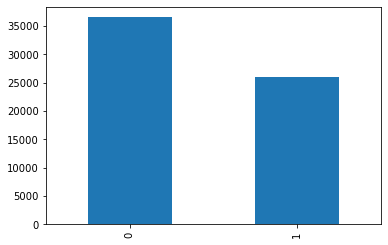

In [13]:
data["DebugSize"].value_counts().plot(kind = "bar")

## 2. Selection

In [14]:
# This is based off correlation between features of the dataset and labels.
data.drop(["FileName", "md5Hash", 'ExportSize', "IatVRA"], axis = 1, inplace = True)

data.head()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,332,0,0,0,4,0,8,0,3,1048576,34112,672,0,1
1,34404,1,121728,10,10,126576,14,10,8,262144,16864,1024,0,1
2,332,0,0,0,4,0,8,0,3,1048576,34112,672,0,1
3,34404,1,19904,10,10,21312,14,10,6,262144,16736,1040,0,1
4,34404,1,97728,10,10,105792,14,10,7,262144,16736,1096,0,1


## 3. Splitting the data
We need to split the data for modelling. We shall adopt the following:
- train_test_split
- Cross validation (K-Fold)

In [15]:
X = data.drop("Benign", axis = 1)
y = data["Benign"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [17]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
#DECLARING THE TRANSFORMERS: ONE FOR NUMERICAL AND THE OTHER FOR CATEGORICAL

numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', OrdinalEncoder())
])

In [19]:
#DECLARING THE NUMERICAL AND CATEGORICAL FEATURES

numeric_features = ['Machine', 'DebugRVA', 'MajorImageVersion',
       'MajorOSVersion', 'ExportRVA', 'MajorLinkerVersion',
       'MinorLinkerVersion', 'NumberOfSections', 'SizeOfStackReserve',
       'DllCharacteristics', 'ResourceSize']

categorical_features = ["DebugSize", "BitcoinAddresses"]
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

In [20]:
# PASSING THE TRANSFORMERS (NUMERICAL AND CATEGORICAL AS ONE) AND THE DESIRED ALGO INTO SKLEARN PIPELINE
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('classifier',RandomForestClassifier())
           ])

In [21]:
model1_2 = pipeline.fit(x_train, y_train)
predi = model1_2.predict(x_test)

In [22]:
print(classification_report(predi, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7132
           1       0.99      1.00      1.00      5365

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



In [23]:
# A CUSTOM FUNCTION TO IMPLEMENT CROSS VALIDATION

def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

## Part IV: Modelling Methodology
### Overview

This is the Machine Learning component of this solution to the task. The workflow for this notebook is outlined as follows:
- Pick algorithms to train on the data
- Make predictions on test data




In [24]:
#DECLARING THE ALGORITHM
model1 = RandomForestClassifier()

In [25]:
# Training With Cross Validation
model_result = cross_validation(model1, X, y, 5)
model_result

{'Training Accuracy scores': array([0.99971993, 0.99955989, 0.99969993, 0.9995999 , 0.99965992]),
 'Mean Training Accuracy': 99.964791549972,
 'Training Precision scores': array([0.99967733, 0.99949295, 0.99986166, 0.99972334, 0.9996773 ]),
 'Mean Training Precision': 0.9996865139933291,
 'Training Recall scores': array([0.99967733, 0.99949295, 0.99944685, 0.99935469, 0.99953906]),
 'Mean Training Recall': 0.9995021766962818,
 'Training F1 scores': array([0.99967733, 0.99949295, 0.99965421, 0.99953898, 0.99960818]),
 'Mean Training F1 Score': 0.9995943289847352,
 'Validation Accuracy scores': array([0.99319837, 0.99591902, 0.99503881, 0.99639914, 0.99639914]),
 'Mean Validation Accuracy': 99.53908938145155,
 'Validation Precision scores': array([0.99536092, 0.99759215, 0.99666543, 0.99704251, 0.9963086 ]),
 'Mean Validation Precision': 0.996593922710311,
 'Validation Recall scores': array([0.98893805, 0.9929941 , 0.99188791, 0.99465241, 0.99539001]),
 'Mean Validation Recall': 0.992772

In [26]:
len(y_train)

49988

In [27]:
len(y_test)

12497

In [28]:
# Training Without Cross Validation
model1.fit(x_train, y_train)
prediction = model1.predict(x_test)

In [29]:
print(prediction[:15], y_test[:15])

[0 1 1 0 0 1 0 1 0 1 1 1 0 1 1] 51802    0
15780    1
3788     1
58196    0
47275    0
3798     1
41296    0
26632    1
46207    0
10574    1
19214    1
7451     1
31785    0
12796    1
11821    1
Name: Benign, dtype: int64


C:\Users\adero\AppData\Local\Temp/ipykernel_2648/1320278211.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(prediction[:15], y_test[:15])


# Evaluation

## Overview

This is the Evaluation component of this solution to the task. The workflow for this notebook is outlined as follows:
- Compare our model's prediction to the actual labels of the test data.
- Visualize some of these evaluations

We will consider the following metrics:
- Accuracy
- Precision
- Recall
- Confusion Matrix
- Area Under Curve (AUC)

In [30]:
# CUSTOM FUNCTION FOR VISUALIZING OUR RESULTS

# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
    # Set size of plot
    plt.figure(figsize=(12,6))
    labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
    X_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
    plt.title(plot_title, fontsize=30)
    plt.xticks(X_axis, labels)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

## 1. Accuracy

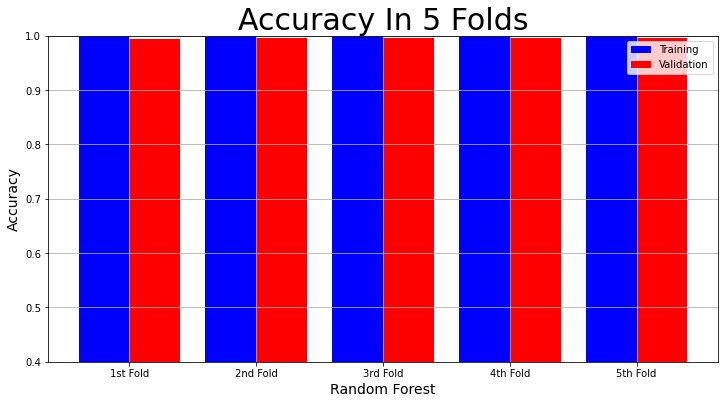

In [31]:
model_name = "Random Forest"
plot_result(model_name, "Accuracy", "Accuracy In 5 Folds",
           model_result["Training Accuracy scores"],
           model_result["Validation Accuracy scores"])

## 2. Precision

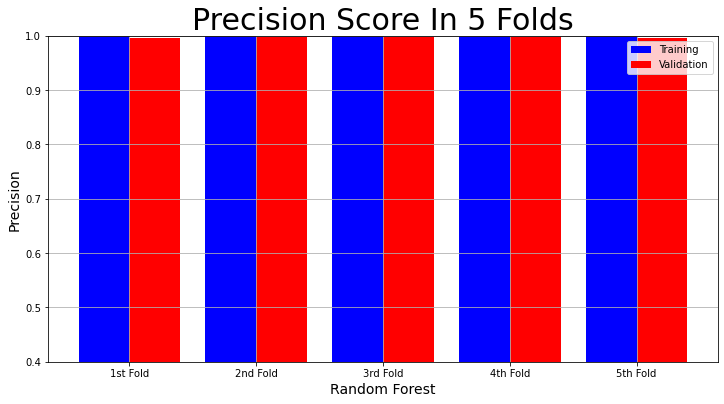

In [32]:
plot_result(model_name, "Precision", "Precision Score In 5 Folds",
           model_result["Training Precision scores"],
           model_result["Validation Precision scores"])

## 3. Recall

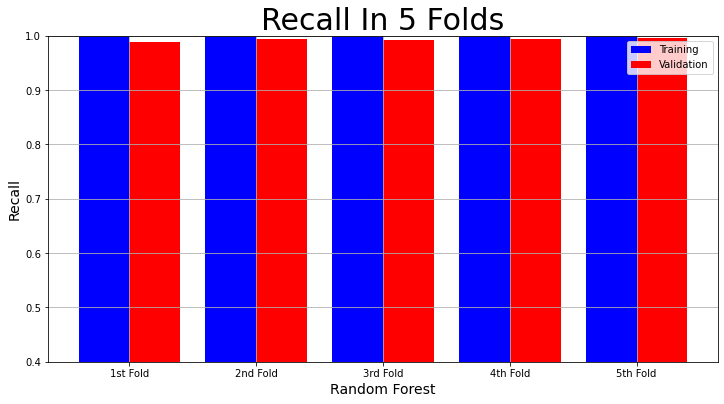

In [33]:
plot_result(model_name, "Recall", "Recall In 5 Folds",
           model_result["Training Recall scores"],
           model_result["Validation Recall scores"])

In [34]:
print(classification_report(prediction, y_test))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7127
           1       1.00      1.00      1.00      5370

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497

[[7102   23]
 [  25 5347]]


C:\Users\adero\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


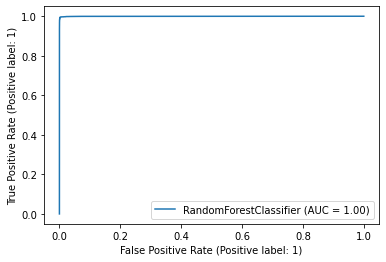

In [35]:
plot_roc_curve(model1, x_test, y_test) 